some of the samples seem to have little to no expressed genes. This notebook is dedicated to solving this and will later be integrated into the snakemake pipeline

In [2]:
import anndata as ad

adata = ad.read_h5ad(
    '../data/archs4_annotated_v2.h5ad'
)

/users/daniel.malzl/.conda/envs/scllm/lib/python3.12/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_expressed_genes = np.array(
    [(row > 0).sum() for row in adata.X]
)
n_expressed_genes

array([33891, 33582, 34444, ..., 24915,   269, 20784])

18808
84171


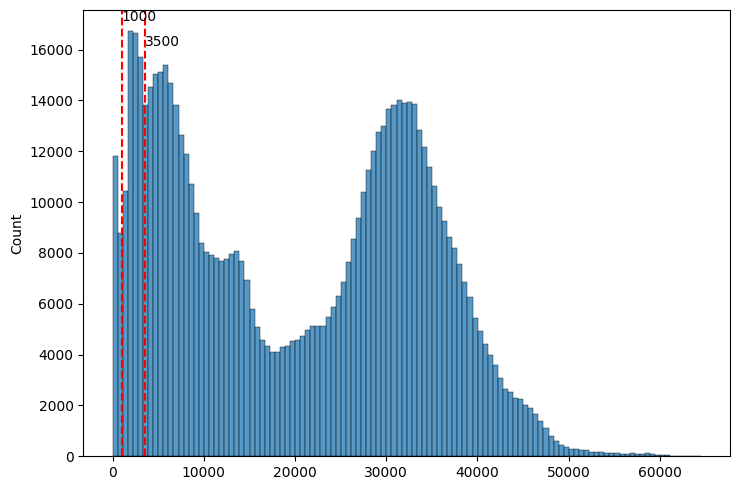

In [43]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42


fig, ax = plt.subplots()

sns.histplot(
    x = n_expressed_genes,
    ax = ax
)

for i, cutoff in enumerate([1000, 3500]):
    print((n_expressed_genes < cutoff).sum())
    ax.axvline(
        cutoff,
        ls = '--',
        c = 'red'
    )
    ymin, ymax = ax.get_ylim()
    ax.text(
        cutoff,
        ymax - 1000 * i,
        f'{cutoff}',
        va = 'top'
    )

fig.set_figwidth(7.5)
fig.set_figheight(5)
fig.tight_layout()
fig.savefig('../plots/ngenes_expressed_per_sample.full.pdf')

7049
18808


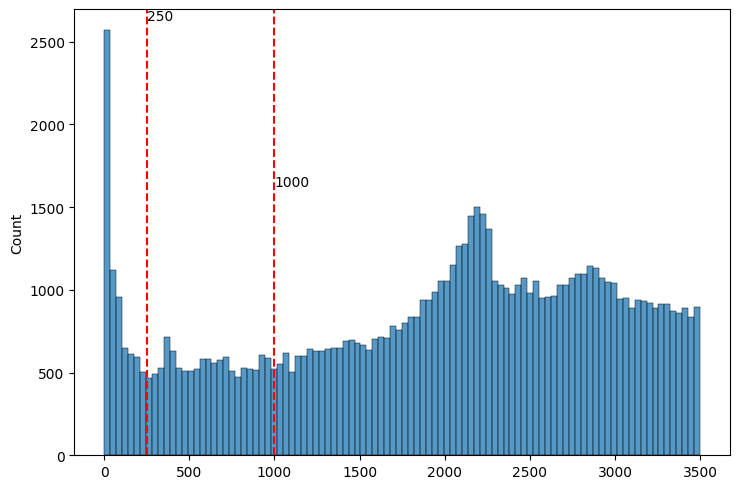

In [44]:
fig, ax = plt.subplots()

sns.histplot(
    x = n_expressed_genes[n_expressed_genes < 3500],
    ax = ax,
    bins = 100
)

for i, cutoff in enumerate([250, 1000]):
    print((n_expressed_genes < cutoff).sum())
    ax.axvline(
        cutoff,
        ls = '--',
        c = 'red'
    )
    ymin, ymax = ax.get_ylim()
    ax.text(
        cutoff,
        ymax - 1000 * i,
        f'{cutoff}',
        va = 'top'
    )

fig.set_figwidth(7.5)
fig.set_figheight(5)
fig.tight_layout()
fig.savefig('../plots/ngenes_expressed_per_sample.zoom.pdf')

In [41]:
adata[n_expressed_genes > 250].write(
    '../data/archs4_annotated_v2.filtered.h5ad'
)